**Diagnose Anemia Type**

In [ ]:
# Import required libraries
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations and arrays
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Static, animated, and interactive visualizations
import re  # Regular expression operations for text processing

# Machine learning libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, RidgeClassifier, LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# For saving and loading models and large data
import joblib
import pickle

# For hyperparameter optimization
from scipy.stats import uniform, randint

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

**Data Processing**

In [ ]:
df = pd.read_csv("/content/diagnosed_cbc_data_v4.csv")

In [ ]:
df.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [ ]:
df.isnull().sum()

WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64

**data split**

In [ ]:
# Define features and target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

**Models**

In [ ]:
models = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': uniform(0.001, 100),
            'solver': ['liblinear', 'saga']
        }
    },
    'RidgeClassifier': {
        'model': RidgeClassifier(random_state=42),
        'params': {
            'alpha': uniform(0.01, 100),
            'solver': ['auto', 'sparse_cg', 'lsqr']
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None, 3, 5, 7, 10],
            'min_samples_split': randint(2, 11),
            'min_samples_leaf': randint(1, 5),
            'criterion': ['gini', 'entropy']
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': randint(50, 201),
            'max_depth': [None, 3, 5, 7, 10],
            'min_samples_split': randint(2, 11),
            'min_samples_leaf': randint(1, 5),
            'criterion': ['gini', 'entropy']
        }
    },
    'AdaBoostClassifier': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {
            'n_estimators': randint(50, 201),
            'learning_rate': uniform(0.01, 1.0)
        }
    },
    'GradientBoostingClassifier': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': randint(50, 201),
            'learning_rate': uniform(0.01, 0.2),
            'max_depth': randint(3, 8),
            'subsample': uniform(0.5, 0.5)
        }
    },

    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': randint(3, 10),
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'SVC': {
        'model': SVC(random_state=42),
        'params': {
            'C': uniform(0.001, 100),
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma': ['scale', 'auto']
        }
    }
}


In [ ]:
# Function to evaluate a classification model
def evaluate_model(model, params, X_train, y_train, X_test, y_test):
    # Perform randomized search
    grid_search = RandomizedSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
    grid_search.fit(X_train, y_train)

    # Get the best model and predictions
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    print(f"Model: {best_model}")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Accuracy Score: {accuracy}")
    print("Classification Report:")
    print(report)
    print("=======================================")

    return best_model, accuracy




In [ ]:
adjusted_accuracies = {}
all_models = {}

for model_name, model_info in models.items():
    print(f"Evaluating and Training {model_name}...")
    best_model, accuracy = evaluate_model(model_info['model'], model_info['params'], X_train, y_train, X_test, y_test)
    adjusted_accuracies[model_name] = accuracy
    all_models[model_name] = best_model

    # Save the model
    with open(f"{model_name}.pkl", 'wb') as file:
        pickle.dump(best_model, file)
    print(f"Model {model_name} saved to {model_name}.pkl")

Evaluating and Training LogisticRegression...
Model: LogisticRegression(C=33.371861113902185, max_iter=1000, random_state=42,
                   solver='saga')
Best parameters: {'C': 33.371861113902185, 'solver': 'saga'}
Accuracy Score: 0.7821011673151751
Classification Report:
{'Healthy': {'precision': 0.8780487804878049, 'recall': 0.8888888888888888, 'f1-score': 0.8834355828220859, 'support': 81}, 'Iron deficiency anemia': {'precision': 0.8823529411764706, 'recall': 0.8823529411764706, 'f1-score': 0.8823529411764706, 'support': 34}, 'Leukemia': {'precision': 1.0, 'recall': 0.4, 'f1-score': 0.5714285714285715, 'support': 5}, 'Leukemia with thrombocytopenia': {'precision': 1.0, 'recall': 0.3333333333333333, 'f1-score': 0.5, 'support': 3}, 'Macrocytic anemia': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Normocytic hypochromic anemia': {'precision': 0.8541666666666666, 'recall': 0.7321428571428571, 'f1-score': 0.7884615384615384, 'support': 56}, 'Normocytic normoch

**Model Evaluation Chart**

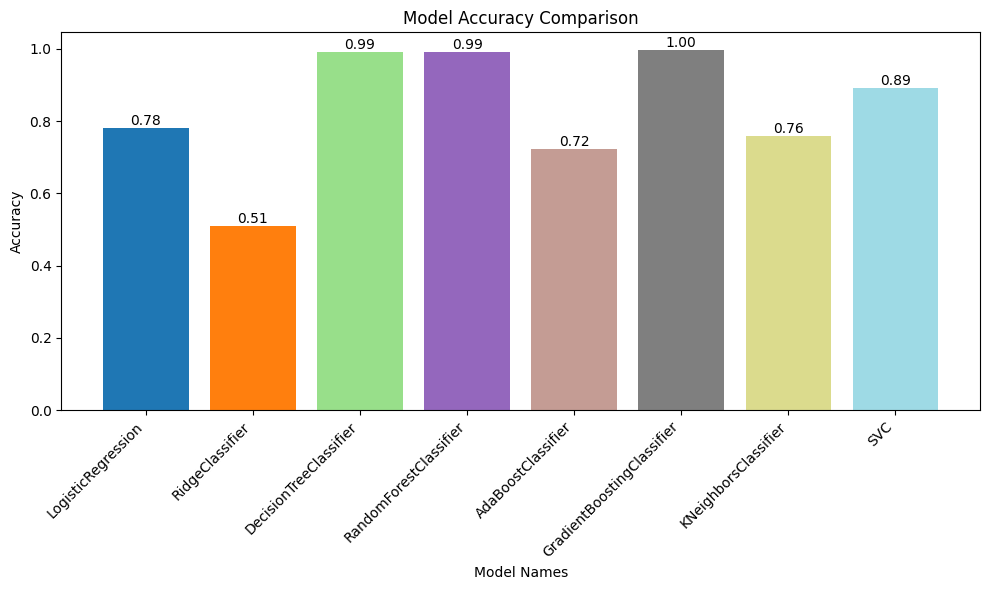

In [ ]:
import matplotlib.pyplot as plt

# Sample data: Replace with actual data from adjusted_accuracies
model_names = list(adjusted_accuracies.keys())
accuracies = list(adjusted_accuracies.values())

# Generate a list of colors for each bar
colors = plt.cm.get_cmap('tab20', len(model_names))

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=[colors(i) for i in range(len(model_names))])

# Add labels and title
plt.xlabel('Model Names')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')

# Show accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Display the chart
plt.tight_layout()
plt.savefig('model_accuracy_comparison.png')
plt.show()
